# Imports

In [79]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
from acquire import get_connection, new_telco_data, get_telco_data
from prepare import clean_telco, impute_mode, train_validate_test_split,impute_mode, prep_telco_data
import explore

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph

## Get and clean data

In [2]:
# clean_telco, gets and preps the dataframe from SQL
df = clean_telco()

## Make sure it is correct

In [3]:
# verify clean_telco worked properly
df.head(2)

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type,payment_type,gender_male,one_year_contract,two_year_contract,credit_card_payment,e_check_payment,mailed_check_payment,dsl_internet,fiber_optic_internet
0,0003-MKNFE,0,0,0,9,1,1,0,0,0,...,DSL,Mailed check,1,0,0,0,0,1,1,0
1,0013-MHZWF,0,0,1,9,1,0,0,0,0,...,DSL,Credit card (automatic),0,0,0,1,0,0,1,0


In [4]:
df.shape

(7043, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   int64  
 3   dependents             7043 non-null   int64  
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   int64  
 6   multiple_lines         7043 non-null   int64  
 7   online_security        7043 non-null   int64  
 8   online_backup          7043 non-null   int64  
 9   device_protection      7043 non-null   int64  
 10  tech_support           7043 non-null   int64  
 11  streaming_tv           7043 non-null   int64  
 12  streaming_movies       7043 non-null   int64  
 13  paperless_billing      7043 non-null   int64  
 14  monthly_charges        7043 non-null   float64
 15  tota

## Establish categorical, quantitative, target data

In [80]:
quant_vars = ['tenure','monthly_charges','total_charges']
cat_vars = list((df.columns).drop(quant_vars))
target = 'churn'

## Split the data

In [7]:
train, validate, test = train_validate_test_split(df)

In [8]:
# make sure all split data contains decreasing rows and equal columns

train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

## Data Exploration

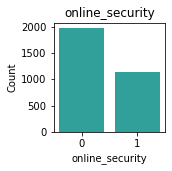

   online_security  Count  Percent
0                0   1966    63.32
1                1   1139    36.68
_________________________________________________________________


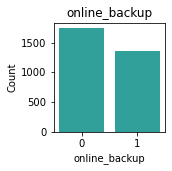

   online_backup  Count  Percent
0              0   1742     56.1
1              1   1363     43.9
_________________________________________________________________


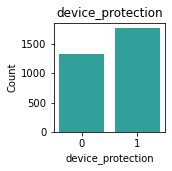

   device_protection  Count  Percent
0                  1   1772    57.07
1                  0   1333    42.93
_________________________________________________________________


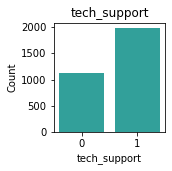

   tech_support  Count  Percent
0             1   1979    63.74
1             0   1126    36.26
_________________________________________________________________


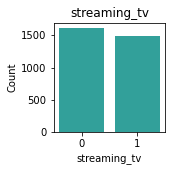

   streaming_tv  Count  Percent
0             0   1610    51.85
1             1   1495    48.15
_________________________________________________________________


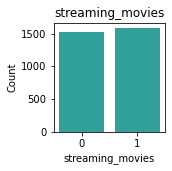

   streaming_movies  Count  Percent
0                 1   1579    50.85
1                 0   1526    49.15
_________________________________________________________________


KeyError: 'tenure'

In [73]:
# explore.explore_univariate(train, cat_vars, quant_vars)

### Takeaways from univariate:
#### Observations:
- There are significantly more non-senior citizens than senior citizens
- There are a lot more customers with dependents
- Significantly more customers with phone service than without
- Less have online security, online backup, device protection, and tech support
- A lot more people churn than stay
- More customers are Month-to-month than in contracts
- Electronis check is the most popular payment method

#### Questions:
- Customers with phone service that have multiple lines?
- Customers with internet that have online services (i.e. online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies)

In [10]:
cat_vars = ['online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  238.949188  6.665480e-54                   1

observed:
 churn               0    1   All
online_security                 
0                1150  816  1966
1                 972  167  1139
All              2122  983  3105

expected:
              0           1
0  1343.591626  622.408374
1   778.408374  360.591626


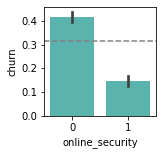


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  85.602485  2.199988e-20                   1

observed:
 churn             0    1   All
online_backup                 
0              1071  671  1742
1              1051  312  1363
All            2122  983  3105

expected:
              0           1
0  1190.506924  551.493076
1   931.493076  431.506924


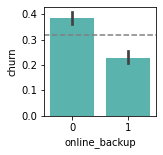


_____________________

device_protection 
_____________________

       chi2       p-value  degrees of freedom
0  89.70391  2.766079e-21                   1

observed:
 churn                 0    1   All
device_protection                 
0                  1089  683  1772
1                  1033  300  1333
All                2122  983  3105

expected:
             0          1
0  1211.00934  560.99066
1   910.99066  422.00934


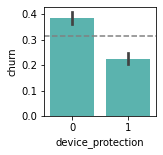


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  232.433777  1.756258e-52                   1

observed:
 churn            0    1   All
tech_support                 
0             1162  817  1979
1              960  166  1126
All           2122  983  3105

expected:
              0           1
0  1352.476006  626.523994
1   769.523994  356.476006


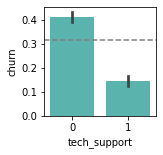


_____________________

streaming_tv 
_____________________

    chi2   p-value  degrees of freedom
0  3.666  0.055533                   1

observed:
 churn            0    1   All
streaming_tv                 
0             1075  535  1610
1             1047  448  1495
All           2122  983  3105

expected:
              0           1
0  1100.296296  509.703704
1  1021.703704  473.296296


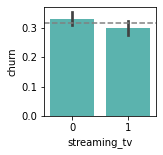


_____________________

streaming_movies 
_____________________

      chi2   p-value  degrees of freedom
0  7.13451  0.007561                   1

observed:
 churn                0    1   All
streaming_movies                 
0                 1044  535  1579
1                 1078  448  1526
All               2122  983  3105

expected:
              0           1
0  1079.110467  499.889533
1  1042.889533  483.110467


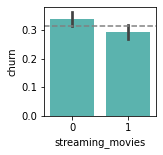


_____________________

tenure 
____________________



KeyError: 'Column not found: tenure'

In [74]:
# explore.explore_bivariate(train, target, cat_vars, quant_vars)

### Bivariate:
#### Observations:
- REALLY LOW p-values
    - senior, partner, dependents, online_security, tech_support, paperless_billing, ***month-to_month***, fiber_optic_internet, one_year, two_year
- Real low p-values
    - online_backup, device_protection, streaming_tv, streaming_movies, 
- barely passes 95% confidence
    - multiple lines
- Not low
    - gender, phone_service
- Vast majority of churn happens before 30 months
- higher monthly bill increases churn

#### Questions:
- Do people with all online services churn more than customers without all of the online services?
- Are the really low p-values a good starting point?

# Does the amount of online services affect churn rates of our customers with internet service?
## Online services are:
   - online security
   - online backup
   - device protection
   - tech supprt
   - streaming tv
   - streaming movies

In [12]:
# Cleaning train, validate and test. 

# only need customers with internet service 
train = train[train.internet_service_type != 'None']
validate = validate[validate.internet_service_type != 'None']
test = test[test.internet_service_type != 'None']

In [13]:
train.shape, validate.shape, test.shape

((3105, 28), (1324, 28), (1088, 28))

In [14]:
# Unecessary information for statistics and modeling

dropcols = ['internet_service_type','senior_citizen','partner','dependents','tenure','phone_service','multiple_lines','paperless_billing','monthly_charges','total_charges','contract_type','payment_type','gender_male','one_year_contract','two_year_contract','credit_card_payment','e_check_payment','mailed_check_payment']
train = train.drop(columns=dropcols)
validate = validate.drop(columns=dropcols)
test = test.drop(columns=dropcols)

In [15]:
train = train.set_index('customer_id')
validate = validate.set_index('customer_id')
test = test.set_index('customer_id')

In [16]:
train.columns[:6]

Index(['online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies'],
      dtype='object')

In [17]:
# adding the column n_services: the sum of all of the extra internet services: 
#     "online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies"

train = train.assign(n_services = train[train.columns[:6]].sum(axis=1))
validate = validate.assign(n_services = validate[validate.columns[:6]].sum(axis=1))
test = test.assign(n_services = test[test.columns[:6]].sum(axis=1))

In [18]:
train.shape, validate.shape, test.shape

((3105, 10), (1324, 10), (1088, 10))

In [19]:
train.n_services.value_counts().sort_values()

6    153
5    313
0    415
4    479
1    530
2    592
3    623
Name: n_services, dtype: int64

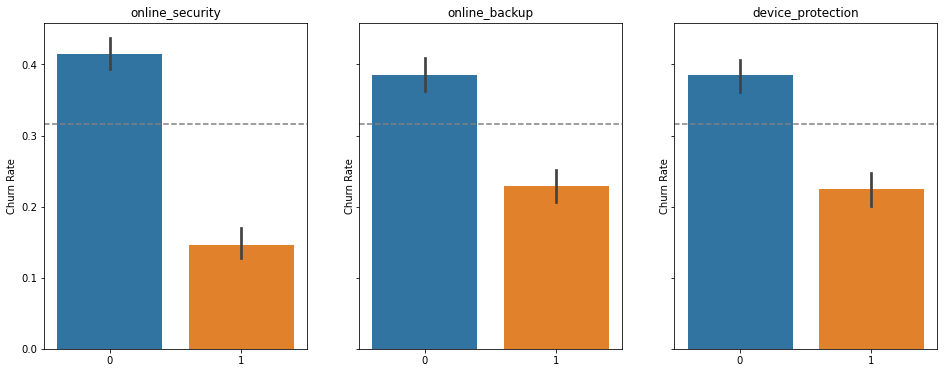

In [20]:
features = ['online_security', 'online_backup', 'device_protection']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(train.churn.mean(), ls='--', color='grey')

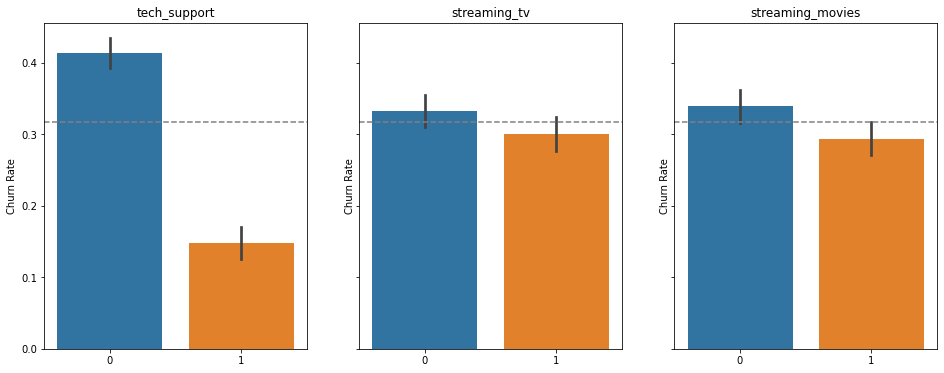

In [21]:
features = ['tech_support', 'streaming_tv', 'streaming_movies']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(train.churn.mean(), ls='--', color='grey')

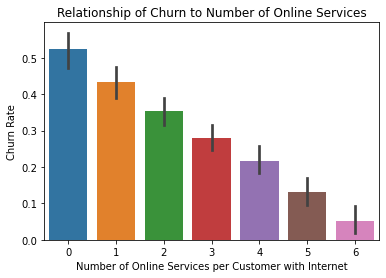

In [22]:
feature = 'n_services'
target = 'churn'
sns.barplot(x=feature, y=target, data=train)
plt.xlabel('Number of Online Services per Customer with Internet')
plt.ylabel('Churn Rate')
plt.title("Relationship of Churn to Number of Online Services")

plt.show()

# Statistical Analysis


## χ<sup>2</sup> test
 - Testing for independence between 2 categorical values.
     - will use confidence level of 0.95 and alpha of 0.05
 - Churn is categorical (i.e. can be 1 or 0)
 - n_services is categorical (i.e. can be integers from 0-6)


In [23]:
# Χ^2 hypotheses:

h0 = 'Churn is independent of the number of online services per internet customer'
h1 = 'We assume that there is an association between churn and the number of online services'

In [24]:
confidence_level = .95
alpha = 1 - confidence_level

In [25]:
observed = pd.crosstab(train.churn, train.n_services)
observed

n_services,0,1,2,3,4,5,6
churn,,,,,,,
0,198,301,383,448,375,272,145
1,217,229,209,175,104,41,8


In [26]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(242.74718634895132,
 1.4537598284914964e-49,
 6,
 array([[283.61674718, 362.20933977, 404.58099839, 425.7668277 ,
         327.35523349, 213.90853462, 104.56231884],
        [131.38325282, 167.79066023, 187.41900161, 197.2331723 ,
         151.64476651,  99.09146538,  48.43768116]]))

In [27]:
if p < alpha:
    print(f"We reject the null hypothesis and move forward w/ the alternative hypothesis: \n{h1}")
else:
    print(f"We fail to reject the null hypothesis: {h0}")

We reject the null hypothesis and move forward w/ the alternative hypothesis: 
We assume that there is an association between churn and the number of online services


## T-test
- I am running a T-test to verify that there is a difference between having no additional online services vs. having any extra online service
- will continue to use the confidence level of 0.95 and alpha of 0.05

In [28]:
# T-test hypotheses 

h0 = 'There is no difference between in the means of customers without any additional online services and  customers with any number of online services.'
h1 = 'There is a difference in the means of customers with online services and those without online services.'

In [29]:
# customers without any additional online services
x1 = train[train.n_services == 0].mean()

# customers with any number of online services
x2 = train[train.n_services != 0].mean()

In [30]:
t,p = stats.ttest_ind(x1, x2)
t, p

(-2.1670563939302734, 0.043890077959799295)

In [31]:
if p < alpha:
    print(f"We reject the null hypothesis and move forward w/ the alternative hypothesis: \n{h1}")
else:
    print(f"We fail to reject the null hypothesis: {h0}")

We reject the null hypothesis and move forward w/ the alternative hypothesis: 
There is a difference in the means of customers with online services and those without online services.


# Modeling

## Baseline

In [32]:
train.churn.value_counts()

0    2122
1     983
Name: churn, dtype: int64

In [33]:
train["most_frequent"] = 0
baseline_accuracy = (train.churn == train.most_frequent).mean()
print(f'My baseline prediction is survived = 0')
print(f'My baseline accuracy is: {baseline_accuracy:.2%}')

My baseline prediction is survived = 0
My baseline accuracy is: 68.34%


In [76]:
print(f'The features used are : {list(X_train.columns)}\n\n')

The features used are : ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'dsl_internet', 'fiber_optic_internet', 'n_services']




In [34]:
X_train = train.drop(columns=['churn','most_frequent'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## kNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_train)

In [38]:
y_pred_proba = knn.predict_proba(X_train)

In [39]:
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred)

In [40]:
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [41]:

print('Accuracy of KNN classifier on training set n_neighbors set to 5: {:.2f}'
     .format(knn.score(X_train, y_train)))
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred)}\n')
print(f'Classificaiton Report:\n{classification_report(y_train, y_pred)}\n')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}')
print('Accuracy of KNN classifier on validate set with n_neighbors set to 5: {:.2f}\n'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set n_neighbors set to 5: 0.71
The confusion matrix:
 [[1828  294]
 [ 606  377]]

Classificaiton Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2122
           1       0.56      0.38      0.46       983

    accuracy                           0.71      3105
   macro avg       0.66      0.62      0.63      3105
weighted avg       0.69      0.71      0.69      3105


The True Positive Rate is: 38.35%
The False Positive Rate is: 13.85%
The True Negative Rate is: 86.15%
The False Negative Rate is: 61.65%
Accuracy of KNN classifier on validate set with n_neighbors set to 5: 0.70



## Random Forest

In [42]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            max_depth=50, 
                            random_state=42)

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, random_state=42)

In [44]:
print(rf.feature_importances_)

[0.22455137 0.05599312 0.05880214 0.20375747 0.0449915  0.03563712
 0.09095232 0.11487894 0.17043604]


In [45]:
y_pred = rf.predict(X_train)

In [46]:
y_pred_proba = rf.predict_proba(X_train)

In [47]:
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred)
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [48]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print(f'\nThe confusion matrix:\n {confusion_matrix(y_train, y_pred)}\n')
print(f'Classificaiton Report:\n{classification_report(y_train, y_pred)}\n')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}')
print('Accuracy of random forest classifier on the validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.73

The confusion matrix:
 [[1825  297]
 [ 542  441]]

Classificaiton Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2122
           1       0.60      0.45      0.51       983

    accuracy                           0.73      3105
   macro avg       0.68      0.65      0.66      3105
weighted avg       0.72      0.73      0.72      3105


The True Positive Rate is: 44.86%
The False Positive Rate is: 14.00%
The True Negative Rate is: 86.00%
The False Negative Rate is: 55.14%
Accuracy of random forest classifier on the validate set: 0.72


## Decision tree

In [49]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

In [52]:
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred)
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [53]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}\n'
      .format(clf.score(X_train, y_train)))
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred)}\n')
print(f'Classificaiton Report:\n {classification_report(y_train, y_pred)}')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}\n')
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.73

The confusion matrix:
 [[1863  259]
 [ 590  393]]

Classificaiton Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81      2122
           1       0.60      0.40      0.48       983

    accuracy                           0.73      3105
   macro avg       0.68      0.64      0.65      3105
weighted avg       0.71      0.73      0.71      3105

The True Positive Rate is: 39.98%
The False Positive Rate is: 12.21%
The True Negative Rate is: 87.79%
The False Negative Rate is: 60.02%

Accuracy of Decision Tree classifier on validate set: 0.72


## Logistic Regression

In [54]:
logit = LogisticRegression(penalty='l2', C=1, random_state=42, solver='lbfgs')

In [55]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

In [56]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.55513499 -0.08301648 -0.1180028  -0.50574664  0.47706331  0.38594441
  -0.42691481  0.45636225 -0.39889319]]
Intercept: 
 [0.03126703]


In [57]:
y_pred = logit.predict(X_train)

In [58]:
y_pred_proba = logit.predict_proba(X_train)

In [75]:

print('Accuracy of Logistic Regression classifier on training set: {:.2f}\n'
     .format(logit.score(X_train, y_train)))
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred)}\n')
print(f'Classificaiton Report:\n {classification_report(y_train, y_pred)}')

Accuracy of Logistic Regression classifier on training set: 0.72

The confusion matrix:
 [[1813  309]
 [ 546  437]]

Classificaiton Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      2122
           1       0.59      0.44      0.51       983

    accuracy                           0.72      3105
   macro avg       0.68      0.65      0.66      3105
weighted avg       0.71      0.72      0.71      3105



In [60]:
print('Accuracy of on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy out-of-sample set: {:.2f}'.format(logit.score(X_validate, y_validate)))

Accuracy of on training set: 0.72
Accuracy out-of-sample set: 0.73



### Logistic Regression Model summary

In [61]:
print(f'My baseline accuracy is: {baseline_accuracy:.2%}\n')

print('Accuracy of on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy out-of-sample validation set: {:.2f}'.format(logit.score(X_validate, y_validate)))
print('Accuracy out-of-sample test set: {:.2f}'.format(logit.score(X_test, y_test)))

My baseline accuracy is: 68.34%

Accuracy of on training set: 0.72
Accuracy out-of-sample validation set: 0.73
Accuracy out-of-sample test set: 0.72


# Predictions CSV

In [62]:
# pull cleaned data

test.head()

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,dsl_internet,fiber_optic_internet,n_services
customer_id,,,,,,,,,,
3420-YJLQT,0,1,0,0,0,0,0,0,1,1
6543-JXSOO,1,1,0,1,0,0,0,1,0,3
6646-JPPHA,1,1,0,0,0,0,0,0,1,2
5759-RCVCB,0,0,0,0,1,0,1,1,0,1
5909-ECHUI,0,0,0,0,0,1,1,1,0,1


In [63]:
features = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'dsl_internet', 'fiber_optic_internet', 'n_services']

In [65]:
# new_df_trimmed = new_df[new_df.internet_service_type != 'None']

# new_df_trimmed = new_df_trimmed.drop(columns=dropcols)
# new_df_trimmed = new_df_trimmed.assign(n_services = new_df_trimmed[new_df_trimmed.columns[1:7]].sum(axis=1))

In [69]:
prediction_df = test

In [70]:
prediction_df['prediction'] = logit.predict(test[features])

In [77]:
predictions = prediction_df[['prediction']]
predictions.sample(5)

,prediction
customer_id,
8314-DPQHL,0
0572-ZJKLT,0
3776-EKTKM,0
4298-OYIFC,0
2645-QTLMB,1
5524-KHNJP,0
8100-HZZLJ,0
3627-FCRDW,1
6253-GNHWH,0


In [78]:
predictions.to_csv('predictions')

# Key Takaways

- It is clear that fewer people churn when they have more online services. 

- What can we do now?

    - Promote online services into bundled packages:
        - For instance: the "Security package" will contain: online_security, online_backup, device_protection and tech_support
        - Along with "Streaming package" that will contain: streaming_tv, streaming_movies, and tech_support as well.

- With additional time dedicated to this project:

    - Investigate fiber optic customers in greater detail and look at possible combinations of factors that might be driving churn within that group.
    - Investigate our pricing structure of all internet service types and online services.
    - Make improvements to this report with more comments, markdown cells, and summary tables.
    - Make improvements to the cooresponding readme.md for this github containing project description with a more in depth explanation of how someone else can recreate this project and findings, and key takeaways from this project.
    - Add models to test varying hyperparameters and features to improve model performance.
